In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv("train.csv")
train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
id     4752 non-null int64
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X14    4752 non-null float64
X15    4752 non-null float64
X16    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X19    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null floa

In [0]:
#같은 feauture?
f_temp=train[['X00','X07','X28','X31','X32']] #기온
f_atmos=train[['X01','X06','X22','X27','X29']] #현지기압
f_wind=train[['X02','X03','X18','X24','X26']] #풍속
f_rain=train[['X04','X10','X21','X36','X39']] #일일누적강수량
f_sea=train[['X05','X08','X09','X23','X33']] #해면기압
f_solar=train[['X11','X14','X16','X19','X34']] #일일누적일사량
f_hum=train[['X12','X20','X30','X37','X38']] #습도
f_dir=train[['X13','X15','X17','X25','X35']] #풍향

In [4]:
f_temp.head()

,X00,X07,X28,X31,X32
0,9.7,12.2,12.3,8.2,10.7
1,9.3,12.1,12.1,8.3,10.3
2,9.4,12.1,12.1,8.0,9.7
3,9.4,12.0,12.1,7.7,9.4
4,9.2,12.0,12.0,7.4,9.4


In [0]:
#누적값 처리
f_solar_each=f_solar.diff().clip(lower=0)
f_rain_each=f_rain.diff().clip(lower=0)

In [6]:
f_solar_each.head()

,X11,X14,X16,X19,X34
0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [7]:
f_rain_each.head()

,X04,X10,X21,X36,X39
0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [0]:
#nan값 처리 
f_solar_each[np.isnan(f_solar_each)] = 0
f_rain_each[np.isnan(f_rain_each)] = 0

```python
#동일한 feature에 해당하는 col은 평균으로 처리 
train['temp'] = (train['X00']+train['X07']+train['X28']+train['X31']+train['X32'])/5  #기온
train['atmos'] = (train['X01']+train['X06']+train['X22']+train['X27']+train['X29'])/5 #현지기압
train['wind'] = (train['X02']+train['X03']+train['X18']+train['X24']+train['X26'])/5  #풍속
train['rain'] = (f_rain_each['X04']+f_rain_each['X10']+f_rain_each['X21']+f_rain_each['X36']+f_rain_each['X39'])/5  #일일누적강수량
train['sea'] = (train['X05']+train['X08']+train['X09']+train['X23']+train['X33'])/5   #해면기압
train['solar'] = (f_solar_each['X11']+f_solar_each['X24']+f_solar_each['X16']+f_solar_each['X19']+f_solar_each['X34'])/5 #일일누적일사량
train['hum'] = (train['X12']+train['X20']+train['X30']+train['X37']+train['X38'])/5   #습도
train['dir'] = (train['X13']+train['X15']+train['X17']+train['X25']+train['X35'])/5   #풍향
train.head(3) #8개
```

In [0]:
#전체 train 가져가는 경우 
train_all=pd.concat([f_solar_each,f_rain_each,f_temp, f_atmos, f_wind, f_sea, f_hum, f_dir],axis=1)

In [10]:
train_all.head(10) #40개 

,X11,X14,X16,X19,X34,X04,X10,X21,X36,X39,X00,X07,X28,X31,X32,X01,X06,X22,X27,X29,X02,X03,X18,X24,X26,X05,X08,X09,X23,X33,X12,X20,X30,X37,X38,X13,X15,X17,X25,X35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,1001.6,1.2,0.6,0.3,1.1,0.5,1009.3,1009.9,1009.8,1009.8,1010.1,82.4,91.0,69.1,77.2,62.6,71.3,101.1,56.1,2.3,256.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,1001.7,1.7,1.9,0.4,0.0,0.0,1009.3,1010.0,1009.9,1009.9,1010.1,81.2,91.9,70.3,77.3,63.5,121.8,165.3,0.0,0.0,215.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,1001.6,1.1,2.3,0.6,0.0,0.0,1009.2,1010.1,1010.1,1009.8,1010.0,86.1,93.3,71.5,77.3,63.9,232.0,144.0,0.0,0.0,235.2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,1008.7,1001.5,1.5,0.7,0.1,0.0,0.2,1009.2,1010.0,1010.0,1009.7,1010.1,87.7,93.4,73.2,77.5,64.5,0.0,115.9,294.1,0.0,214.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,1008.7,1001.5,0.8,1.7,0.0,0.0,0.0,1009.2,1010.1,1010.0,1009.7,1010.1,88.9,94.1,74.3,78.0,65.0,0.0,124.7,0.0,0.0,174.9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.1,12.0,12.0,7.3,9.1,988.9,989.6,1002.3,1008.7,1001.5,1.3,0.7,0.2,0.0,0.0,1009.1,1010.0,1010.0,1009.7,1010.1,90.7,94.6,75.7,78.7,65.1,222.0,174.2,0.0,0.0,243.1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.1,12.0,11.8,7.1,8.6,988.8,989.6,1002.3,1008.7,1001.4,2.4,1.9,0.3,0.0,0.0,1009.1,1010.1,1010.0,1009.6,1010.1,90.2,94.9,79.0,78.6,65.5,257.8,168.9,0.0,0.0,195.8
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9,11.9,11.8,7.1,8.8,988.9,989.7,1002.4,1008.7,1001.5,1.0,1.2,0.4,0.0,0.0,1009.2,1010.1,1010.1,1009.7,1010.1,91.9,95.0,78.2,78.6,65.7,226.4,112.8,0.0,0.0,262.7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.9,11.6,7.0,8.8,988.9,989.6,1002.4,1008.7,1001.5,1.5,0.1,0.6,0.0,0.0,1009.2,1010.0,1010.1,1009.7,1010.1,92.2,95.5,77.5,78.8,66.5,215.0,157.4,0.0,0.0,236.1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,11.8,11.5,7.1,8.5,988.9,989.6,1002.5,1008.6,1001.5,1.4,0.4,0.6,0.0,0.0,1009.4,1010.1,1010.1,1009.7,1010.0,92.7,95.6,79.3,78.8,67.6,214.4,134.0,0.0,0.0,230.9


In [0]:
#30일 데이터로 먼저 학습 
X_train = train_all[:4320]
y_train = train[['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][:4320]

In [15]:
y_train.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5


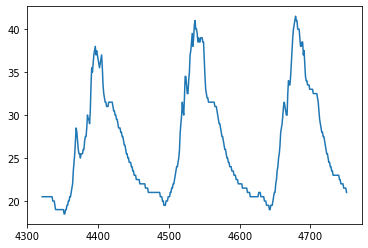

In [16]:
#target
import matplotlib.pyplot as plt
plt.plot(train['Y18'][4321:])
plt.show()

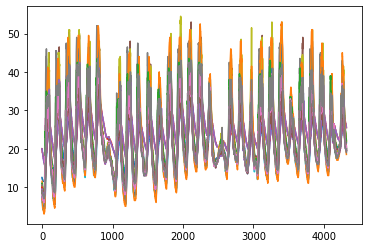

In [17]:
plt.plot(y_train)
plt.show()

## 시계열 데이터 딥러닝 모델참고 예제 <br>
- 나스닥100 주식 예측 : https://m.blog.naver.com/silvury/220939233742
- stacked LSTM : https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
- keras 참고 : https://www.codeonweb.com/entry/fe7882d2-e42a-4ef3-bbc2-e616d366e013
- 주택가격 예측 딥러닝 모델 : https://www.codeonweb.com/entry/fe7882d2-e42a-4ef3-bbc2-e616d366e013
- 시계열 예측에서의 LSTM : https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

## 30일 데이터 사용 모델
1. DNN (mse : 18)
2. LSTM for regressor ( mse : 
4. stack LSTM
5. stacked LSTM with Memory based between batches
6. GRU

DNN

In [0]:
import pandas as pd
%tensorflow_version 1.x
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras

In [0]:
X_train = X_train.values #30일데이터
y_train = y_train.values

In [0]:
#normalize
sc = MinMaxScaler(feature_range=(0,1))
X_train=sc.fit_transform(X_train)
y_test=sc.fit_transform(y_test)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [167]:
X_train.shape

(3888, 40)

In [84]:
y_train #확인 

array([[22. , 24.5, 25. , ..., 26. , 29. , 28.5],
       [29.5, 38.5, 38.5, ..., 38. , 40.5, 43. ],
       [20. , 25. , 25. , ..., 27.5, 30. , 33. ],
       ...,
       [14.5, 13.5, 13.5, ..., 13. , 13. , 12.5],
       [24. , 31.5, 31.5, ..., 32. , 31.5, 36.5],
       [19. , 18.5, 18.5, ..., 16.5, 16. , 16. ]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [31]:
#초기화 
keras.initializers.he_normal(seed=None) #randomnormal
clf = Sequential([
    Dense(15, kernel_initializer='uniform', input_dim=40, activation='elu'),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(25, kernel_initializer='uniform', activation='elu'),
    Dense(18, kernel_initializer='uniform', activation='elu'),
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                615       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_4 (Dense)              (None, 18)                468       
Total params: 1,928
Trainable params: 1,928
Non-trainable params: 0
_________________________________________________________________


In [33]:
#학습
clf.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [34]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(X_train, y_train, batch_size=15, epochs=2)




Epoch 1/2





3888/3888 [==============================] - 1s 262us/step - loss: 227.9460 - acc: 0.1163
Epoch 2/2
3888/3888 [==============================] - 0s 89us/step - loss: 35.4127 - acc: 0.1908


In [35]:
score = clf.evaluate(X_test, y_test, verbose=0)
print(clf.metrics_names[0])
print(score[0]) #mse

loss
18.722411614877206


LSTM for regression

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import LSTM
#import CallBack
%matplotlib inline

In [168]:
X_train.shape

(3888, 40)

In [0]:
#original : [samples, features] 
#LSTM data shape : [samples, time steps, features]
X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [170]:
X_train_reshape.shape

(3888, 1, 40)

In [0]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, X_train_reshape.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(18))

In [0]:
#학습
model.compile(loss='mean_squared_error', optimizer='adam')

In [173]:
#visible 40 inputs, hidden layer with 4 LSTM blocks and output makes 18 prediction
model.fit(X_train_reshape, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 10s - loss: 367.1627
Epoch 2/100
 - 8s - loss: 142.2241
Epoch 3/100
 - 8s - loss: 94.6261
Epoch 4/100
 - 9s - loss: 85.4876
Epoch 5/100
 - 8s - loss: 88.3727
Epoch 6/100
 - 8s - loss: 87.7560
Epoch 7/100
 - 9s - loss: 85.1491
Epoch 8/100
 - 9s - loss: 84.6243
Epoch 9/100
 - 9s - loss: 80.9298
Epoch 10/100
 - 9s - loss: 80.8687
Epoch 11/100
 - 9s - loss: 79.2602
Epoch 12/100
 - 9s - loss: 78.1720
Epoch 13/100
 - 9s - loss: 77.9660
Epoch 14/100
 - 9s - loss: 77.1171
Epoch 15/100
 - 9s - loss: 76.3239
Epoch 16/100
 - 9s - loss: 76.4479
Epoch 17/100
 - 9s - loss: 76.3306
Epoch 18/100
 - 9s - loss: 74.8235
Epoch 19/100
 - 9s - loss: 73.9092
Epoch 20/100
 - 9s - loss: 70.7064
Epoch 21/100
 - 9s - loss: 72.4443
Epoch 22/100
 - 9s - loss: 71.5637
Epoch 23/100
 - 9s - loss: 71.0060
Epoch 24/100
 - 9s - loss: 71.5811
Epoch 25/100
 - 9s - loss: 69.2968
Epoch 26/100
 - 9s - loss: 69.7040
Epoch 27/100
 - 9s - loss: 69.6854
Epoch 28/100
 - 9s - loss: 68.4110
Epoch 29/100
 - 9s - loss:

In [0]:
# make predictions
trainPredict = model.predict(X_train_reshape)
testPredict = model.predict(X_test_reshape)

In [0]:
trainPredict = sc.inverse_transform(trainPredict)

In [0]:
testPredict = sc.inverse_transform(testPredict)

In [0]:
trainY = sc.inverse_transform(y_train)
testY = sc.inverse_transform(y_test)

In [178]:
len(trainPredict)

3888

In [179]:
import math
from sklearn.metrics import mean_squared_error


trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 315.51 RMSE
Test Score: 321.50 RMSE


## stacked LSTM with MeMory Between Batches

In [0]:
batch_size = 1
look_back = 40

In [125]:
X_train.shape

(3499, 40)

In [0]:
#data shape
trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
testX = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [144]:
testX.shape

(389, 40, 1)

In [0]:
model = Sequential()
model.add(LSTM(30, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(30, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(18))

In [0]:
#학습
model.compile(loss='mean_squared_error', optimizer='adam')

```python
# 오래걸림, loss매우 큼
for i in range(10):
	model.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
```